In [1]:
import pandas as pd
from patsy.desc import test_ModelDesc_from_formula
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns

# 편향 데이터

In [2]:
# 1. 데이터 불러오기
df = pd.read_csv('titanic_train_male_large.csv')
data_df = df
data_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,3,"Lundstrom, Mr. Thure Edvin",1,32.0,0,0,350403,7.5792,NaN,S,1
1,3,"Dean, Master. Bertram Vere",1,1.0,1,2,C.A. 2315,20.5750,NaN,S,1
2,3,"Jansson, Mr. Carl Olof",1,21.0,0,0,350034,7.7958,NaN,S,1
3,3,"Johnson, Master. Harold Theodor",1,4.0,1,1,347742,11.1333,NaN,S,1
4,2,"Wells, Master. Ralph Lester",1,2.0,1,1,29103,23.0000,NaN,S,1


In [3]:
data_df.shape

(543, 11)

survived
0    411
1    132
Name: count, dtype: int64


<Axes: xlabel='survived'>

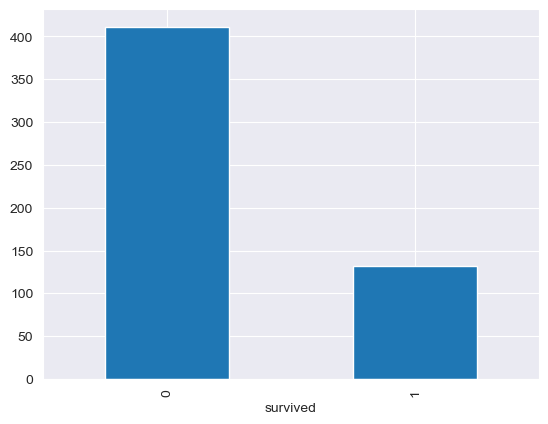

In [4]:
data_df['age'] = (data_df['age']//10)*10
print(data_df['survived'].value_counts())
data_df['survived'].value_counts().plot(kind='bar')

In [5]:
test = pd.read_csv('test.csv')
train = data_df
print(train.shape)
print(test.shape)

(543, 11)
(210, 11)


In [6]:
test['age'] = (test['age']//10)*10

survived
0    411
1    132
Name: count, dtype: int64


<Axes: xlabel='survived'>

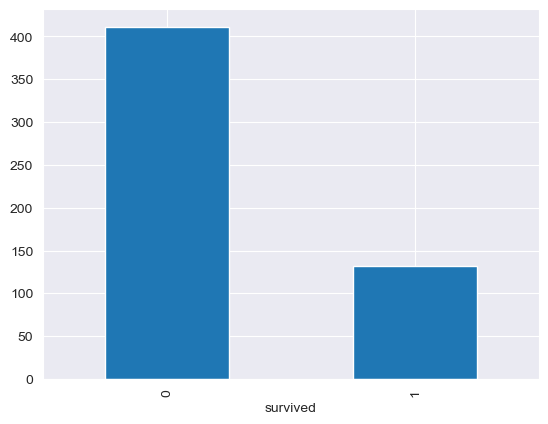

In [7]:
data_df.corr(numeric_only=True)
# train data 생존자 비율
print(train['survived'].value_counts())
train['survived'].value_counts().plot(kind='bar')

pclass
3    286
1    131
2    126
Name: count, dtype: int64


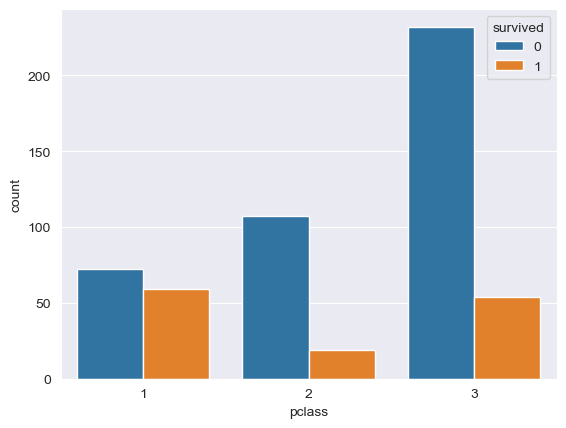

In [8]:
#클래스별 생존자 비율
print(train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived', data=train)

age
20.0    185
30.0    124
40.0     80
10.0     65
50.0     37
0.0      31
60.0     16
70.0      4
80.0      1
Name: count, dtype: int64


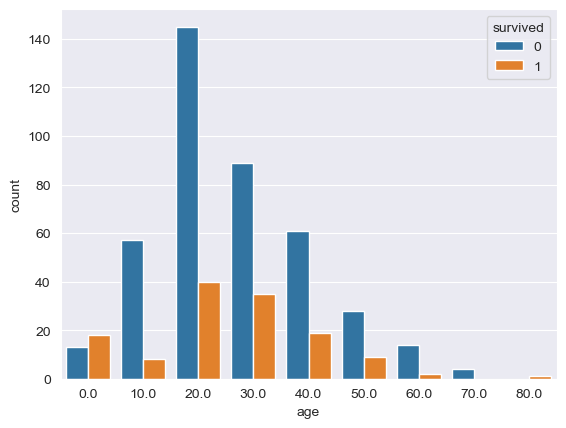

In [9]:
#연령별 생존자 비율
print(train['age'].value_counts())
ax = sns.countplot(x='age', hue='survived', data=train)

In [10]:
train.groupby(['pclass','age']).mean(numeric_only=True)

sex     sibsp     parch        fare  survived
pclass age                                                     
1      0.0   1.000000  0.500000  2.000000  143.025000  1.000000
       10.0  1.000000  0.800000  1.200000  129.851660  0.600000
       20.0  0.923077  0.461538  0.230769   78.654488  0.500000
       30.0  0.884615  0.384615  0.269231   53.712338  0.500000
       40.0  0.882353  0.470588  0.058824   62.058703  0.500000
       50.0  0.875000  0.541667  0.375000   79.765100  0.375000
       60.0  1.000000  0.363636  0.818182   96.345836  0.090909
       70.0  1.000000  0.500000  0.500000   60.252100  0.000000
       80.0  1.000000  0.000000  0.000000   30.000000  1.000000
2      0.0   1.000000  0.666667  1.333333   27.666667  1.000000
       10.0  1.000000  0.000000  0.000000   26.307692  0.000000
       20.0  0.975610  0.341463  0.048780   19.963107  0.121951
       30.0  0.914286  0.342857  0.142857   18.997500  0.171429
       40.0  0.944444  0.333333  0.388889   22.294211  0.055556
       50.0  1.000000  0.000000  0.000000   14.815625  0.000000
       60.0  1.000000  0.250000  0.250000   17.421875  0.250000
       70.0  1.000000  0.000000  0.000000   10.500000  0.000000
3      0.0   0.913043  2.434783  1.304348   23.256700  0.434783
       10.0  0.957447  0.702128  0.425532   14.046632  0.106383
       20.0  0.957627  0.135593  0.076271    9.458788  0.186441
       30.0  0.936508  0.238095  0.253968   12.128437  0.253968
       40.0  0.892857  0.214286  0.785714   12.123214  0.035714
       50.0  1.000000  0.200000  0.000000    9.080840  0.000000
       60.0  1.000000  0.000000  0.000000   24.250000  0.000000
       70.0  1.000000  0.000000  0.000000    7.750000  0.000000

In [11]:
train_data_df = train[['pclass','age']]
train_data_df.head()

,pclass,age
0,3,30.0
1,3,0.0
2,3,20.0
3,3,0.0
4,2,0.0


In [12]:
train_label_df = train[['survived']]
train_label_df.head()

,survived
0,1
1,1
2,1
3,1
4,1


In [13]:
train_data = train_data_df.values
train_data

array([[ 3., 30.],
       [ 3.,  0.],
       [ 3., 20.],
       ...,
       [ 3.,  0.],
       [ 3., 10.],
       [ 3.,  0.]])

In [14]:
train_label = train_label_df.values.ravel()
train_label

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [15]:
test_data_df = test[['pclass','age']]
test_data_df

,pclass,age
0,2,20.0
1,3,20.0
2,2,30.0
3,3,30.0
4,2,20.0
...,...,...
205,2,0.0
206,2,40.0
207,3,60.0
208,3,30.0


In [16]:
test_label_df = test[['survived']]
test_label_df

,survived
0,1
1,1
2,1
3,0
4,0
...,...
205,1
206,0
207,0
208,0


In [17]:
test_data = test_data_df.values
test_data

array([[ 2., 20.],
       [ 3., 20.],
       [ 2., 30.],
       [ 3., 30.],
       [ 2., 20.],
       [ 3., 20.],
       [ 3., 30.],
       [ 2., 40.],
       [ 3., 10.],
       [ 2., 40.],
       [ 3., 30.],
       [ 2., 30.],
       [ 2., 50.],
       [ 2., 20.],
       [ 3., 10.],
       [ 3., 20.],
       [ 3., 20.],
       [ 2., 20.],
       [ 1., 20.],
       [ 1., 40.],
       [ 3., 60.],
       [ 2., 20.],
       [ 1.,  0.],
       [ 3., 30.],
       [ 1., 30.],
       [ 1., 30.],
       [ 1., 60.],
       [ 3.,  0.],
       [ 3., 20.],
       [ 1., 20.],
       [ 1., 30.],
       [ 1., 40.],
       [ 1., 40.],
       [ 3., 10.],
       [ 1., 40.],
       [ 3., 10.],
       [ 1., 40.],
       [ 2., 20.],
       [ 2., 20.],
       [ 3., 10.],
       [ 3., 10.],
       [ 2., 10.],
       [ 1., 20.],
       [ 2., 20.],
       [ 3.,  0.],
       [ 2., 50.],
       [ 3., 20.],
       [ 3., 30.],
       [ 3., 20.],
       [ 3., 30.],
       [ 1., 10.],
       [ 1., 50.],
       [ 2.,

In [18]:
test_label = test_label_df.values.ravel()
test_label

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [19]:
clf = svm.SVC(C=1, gamma=0.1)
clf.fit(train_data,train_label)

pred_svm = clf.predict(test_data)
test['survived_predict'] = pred_svm
test

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,survived_predict
0,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",0,20.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0
1,3,"Buckley, Mr. Daniel",1,20.0,0,0,330920,7.8208,NaN,Q,1,0
2,2,"Ware, Mrs. John James (Florence Louise Long)",0,30.0,0,0,CA 31352,21.0000,NaN,S,1,0
3,3,"Connaghton, Mr. Michael",1,30.0,0,0,335097,7.7500,NaN,Q,0,0
4,2,"Laroche, Mr. Joseph Philippe Lemercier",1,20.0,1,2,SC/Paris 2123,41.5792,NaN,C,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
205,2,"Becker, Master. Richard F",1,0.0,2,1,230136,39.0000,F4,S,1,1
206,2,"Harbeck, Mr. William H",1,40.0,0,0,248746,13.0000,NaN,S,0,0
207,3,"Duane, Mr. Frank",1,60.0,0,0,336439,7.7500,NaN,Q,0,0
208,3,"Johansson, Mr. Gustaf Joel",1,30.0,0,0,7540,8.6542,NaN,S,0,0


pclass
3    102
2     56
1     52
Name: count, dtype: int64


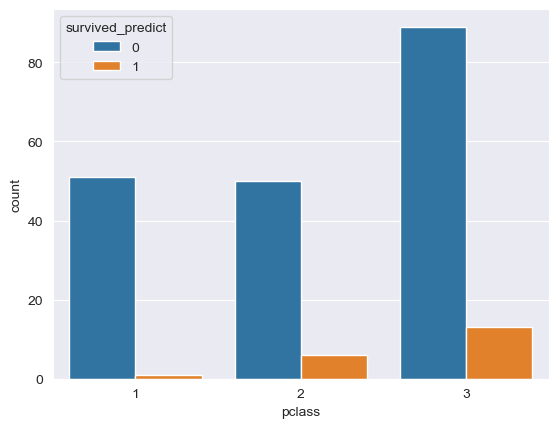

In [20]:
print(test['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived_predict', data=test)

sex
1    148
0     62
Name: count, dtype: int64


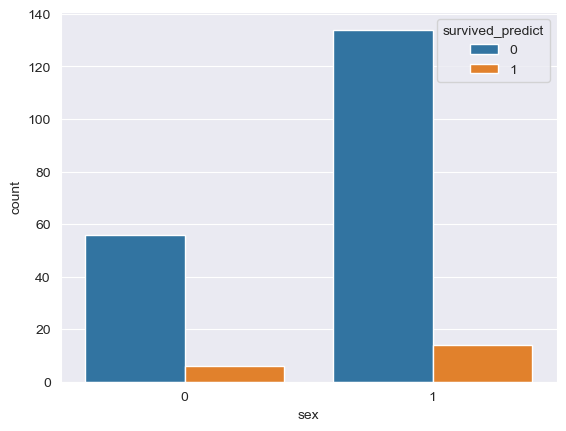

In [21]:
print(test['sex'].value_counts())
ax = sns.countplot(x='sex',hue='survived_predict',data=test)

age
20.0    76
30.0    40
10.0    26
40.0    25
0.0     20
50.0    14
60.0     7
70.0     2
Name: count, dtype: int64


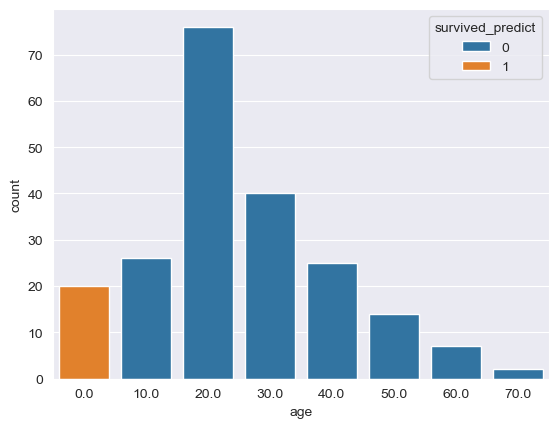

In [22]:
print(test['age'].value_counts())
ax = sns.countplot(x='age',hue='survived_predict',data=test)

In [23]:
test.groupby(['pclass','sex']).mean(numeric_only=True)

age     sibsp     parch        fare  survived  \
pclass sex                                                        
1      0    30.000000  0.750000  0.500000  114.252300  1.000000   
       1    36.250000  0.281250  0.343750   89.616800  0.187500   
2      0    26.842105  0.473684  1.000000   25.384211  0.947368   
       1    24.864865  0.513514  0.351351   21.826127  0.243243   
3      0    14.782609  0.826087  0.869565   15.277000  0.521739   
       1    21.645570  0.708861  0.278481   12.980115  0.139241   

            survived_predict  
pclass sex                    
1      0            0.000000  
       1            0.031250  
2      0            0.052632  
       1            0.135135  
3      0            0.217391  
       1            0.101266

In [28]:
print(f'실제 생존한 남성 수 : {len(test_label)}/{test_label.sum()}\n편향된 데이터로 예측한 남성 생존자수 {len(test_label)}/{test["survived_predict"].sum()}')

실제 생존한 남성 수 : 210/76
편향된 데이터로 예측한 남성 생존자수 210/20
